# **Exploring Macroeconomic Data with the World Bank's API**
*Course:* Micro-Macro Economics for Electrical Engineers \\
*Author:* David Cardona-Vasquez \\
*Date:* Winter Semester 2022 \\
*License:* MIT \\

Paper for Cobb-Douglas exercise:
https://paperswithcode.com/paper/the-cobb-douglas-production-function

In [1]:
# First let us install the World Bank Data API
!pip install wbgapi
!pip install openpyxl
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import wbgapi as wb

%matplotlib inline

In [4]:
df_sources = pd.DataFrame(wb.source.info().table())
df_series = pd.DataFrame(wb.series.info().table())
df_economies = pd.DataFrame(wb.economy.info().table())

df_sources.to_excel('df_sources.xlsx', index=False)
df_series.to_excel('df_series.xlsx', index=False)
df_economies.to_excel('df_economies.xlsx', index=False)

In [5]:


def plot_data(code, countries=['AUT', 'COL'], plot_title='USD - 1000s of millions'):
  df_data = (wb.data.DataFrame(code, countries))
  if 'NY.GDP' in code:
      df_data = df_data/1e9
  title = df_series[df_series.iloc[:, 0] == code].values[0][1]
  df_data.replace("NaN", np.NaN, inplace=True)
  df_data = df_data.T
  sns.set(rc={'figure.figsize': (16, 5.27)})
  plt.xticks(np.arange(0, 61, 4))
  fig = sns.lineplot(x=df_data.index, y = countries[0], data=df_data, label=countries[0])
  for c in countries[1:]:
      sns.lineplot(x=df_data.index, y = c, data=df_data, label=c)
  
  fig.set(title=plot_title, ylabel=title, xlabel='year')
  fig.legend()
  plt.show()

  return df_data

# **Basic Data Manipulation**

0      ABW
1      AFE
2      AFG
3      AFW
4      AGO
      ... 
261    XKX
262    YEM
263    ZAF
264    ZMB
265    ZWE
Name: 0, Length: 266, dtype: object

In [6]:
countries = df_economies.iloc[:266, 0].astype(str)
gdp = wb.data.DataFrame('NY.GDP.PCAP.KD', countries).replace('NaN', np.NaN).T

In [9]:
gdp

economy,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
YR1960,NaN,1179.058077,NaN,1088.483404,NaN,NaN,NaN,NaN,NaN,7410.305029,...,NaN,NaN,NaN,3608.126850,NaN,NaN,NaN,3974.033611,1200.763743,1137.390585
YR1961,NaN,1151.433058,NaN,1085.702205,NaN,NaN,NaN,NaN,NaN,7687.517338,...,NaN,NaN,NaN,3694.968086,NaN,NaN,NaN,4012.896637,1179.297870,1172.379107
YR1962,NaN,1210.086966,NaN,1102.996814,NaN,NaN,NaN,NaN,NaN,7498.840061,...,NaN,NaN,NaN,3823.614985,NaN,NaN,NaN,4135.767498,1113.947203,1152.835674
YR1963,NaN,1238.291625,NaN,1157.911826,NaN,NaN,NaN,NaN,NaN,6986.564802,...,NaN,NaN,NaN,3937.998747,NaN,NaN,NaN,4308.042818,1114.207427,1187.252745
YR1964,NaN,1259.640033,NaN,1194.157146,NaN,NaN,NaN,NaN,NaN,7572.231166,...,NaN,NaN,NaN,4109.998137,NaN,NaN,NaN,4509.884852,1210.988441,1138.054109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YR2018,31705.278824,1533.744255,578.985545,1828.913233,2677.249833,4431.555607,39320.092448,6349.072971,43644.147047,13105.397163,...,35183.235752,3090.772241,2815.587152,10777.870452,4277.341956,4009.122332,1194.820559,6250.997544,1331.449244,1462.590279
YR2019,31762.733960,1524.732633,584.386515,1839.220630,2569.701651,4543.387723,39413.790879,6306.461790,43785.417271,12716.224204,...,36273.095100,3288.353073,2838.988278,10941.964488,4421.294484,4219.097435,1182.507094,6189.289245,1310.622224,1342.989586
YR2020,25823.634941,1442.066780,553.036131,1775.710058,2346.846019,4418.660885,34394.414041,5883.140843,41276.055513,11341.268366,...,35620.871916,3352.060157,2634.243892,10499.647111,4223.588113,3990.986112,1057.281671,5726.262775,1237.283303,1213.117057
YR2021,30271.833634,1466.344792,426.229401,1800.075642,2300.974614,4857.111955,36616.100762,5995.466520,42535.966046,12402.490791,...,NaN,3409.024717,2589.421173,11037.294044,3855.568987,4429.975723,1024.569905,5947.887199,1257.934757,1289.199067


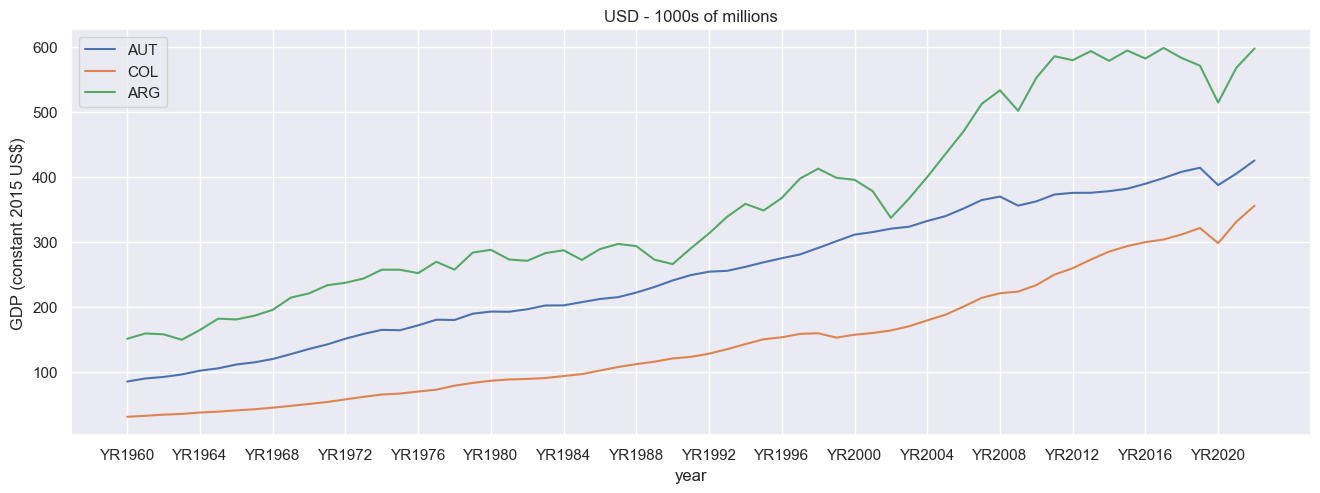

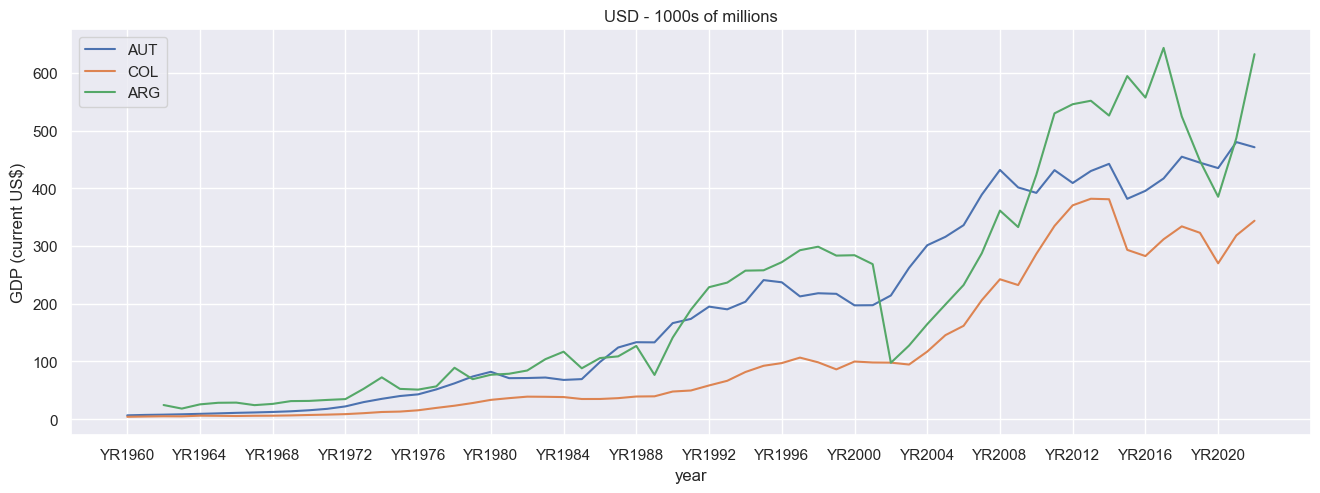

In [8]:
gdp_constant = 'NY.GDP.MKTP.KD'
gdp_current = 'NY.GDP.MKTP.CD'

aux_countries = countries=['AUT', 'COL', 'ARG']
df_gdp_constant = plot_data(gdp_constant, aux_countries)
df_gdp_current = plot_data(gdp_current, aux_countries)

# **Life Expectancy and GDP**

In [9]:
exp_code = "SP.DYN.LE00.FE.IN"

df_exp = wb.data.DataFrame(exp_code, ['COL', 'AUT']).replace('NaN', np.NaN).T
df_exp.ffill(inplace=True)
title = df_series[df_series.iloc[:, 0] == exp_code].values[0][1]

df_data = pd.merge(left=df_gdp_constant.loc[:, ['AUT', 'COL']], right=df_exp, left_index=True, 
                   right_index=True)
df_data.columns = ['AUT_GDP', 'COL_GDP', 'AUT_LE', 'COL_LE']
df_data

,AUT_GDP,COL_GDP,AUT_LE,COL_LE
YR1960,84.930958,30.607352,71.92,59.187
YR1961,89.634417,32.165026,72.84,59.765
YR1962,92.008541,33.905762,72.48,60.309
YR1963,95.816101,35.020145,72.65,60.870
YR1964,101.684218,37.179817,73.20,61.368
...,...,...,...,...
YR2018,408.030932,311.479215,84.10,79.660
YR2019,414.222347,321.405607,84.20,79.721
YR2020,387.488568,298.096311,83.60,78.136
YR2021,405.145844,330.935177,83.80,76.442


In [15]:
model_aut = smf.ols(formula='AUT_LE ~ AUT_GDP', data=df_data).fit()
model_aut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AUT_LE   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     3363.
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           4.56e-55
Time:                        10:59:39   Log-Likelihood:                -50.116
No. Observations:                  63   AIC:                             104.2
Df Residuals:                      61   BIC:                             108.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.9867      0.182    378.059      0.000      68.622      69.352
AUT_GDP        0.0389      0.001     57.995      0.000       0.038       0.040
==============================================================================
Omnibus:                        3.557   Durbin-Watson:                   0.278
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                2.795
Skew:                          -0.499   Prob(JB):                        0.247
Kurtosis:                       3.261   Cond. No.                         723.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
model_aut = smf.ols(formula='COL_LE ~ COL_GDP', data=df_data).fit()
model_aut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 COL_LE   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     233.4
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           1.60e-22
Time:                        13:25:07   Log-Likelihood:                -154.13
No. Observations:                  63   AIC:                             312.3
Df Residuals:                      61   BIC:                             316.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.0595      0.670     94.092      0.000      61.719      64.400
COL_GDP        0.0597      0.004     15.278      0.000       0.052       0.068
==============================================================================
Omnibus:                        6.602   Durbin-Watson:                   0.063
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.808
Skew:                          -0.790   Prob(JB):                       0.0332
Kurtosis:                       2.686   Cond. No.                         321.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **Estimating the Original Cobb-Douglas Function**

In [17]:
df_cobb_douglas = pd.read_excel('df_cobb_douglas.xlsx') 

In [13]:
df_cobb_douglas.describe()

,Year,output,capital,labour
count,24.000000,24.000000,24.000000,24.000000
mean,1910.500000,5.077336,5.356483,4.962723
std,7.071068,0.269234,0.459177,0.201077
min,1899.000000,4.605170,4.605170,4.605170
25%,1904.750000,4.832282,4.984773,4.808086
50%,1910.500000,5.056164,5.356408,4.973274
75%,1916.250000,5.277434,5.726352,5.048066
max,1922.000000,5.480639,6.066108,5.298317


In [14]:
df_log_cobb = np.log(df_cobb_douglas)
df_log_cobb.columns = [ s + "_log" for s in df_cobb_douglas.columns]
df = pd.merge(df_cobb_douglas, df_log_cobb, left_index=True, right_index=True)

In [15]:
df_log_cobb = np.log(df_cobb_douglas)
df_log_cobb.columns = [str.strip(s)+"_log" for s in df_log_cobb.columns ]
df_data = pd.merge(df_cobb_douglas, df_log_cobb, left_index=True, 
                   right_index=True)

In [16]:
df_data['log_l_log_c'] = df_data.labour_log - df_data.capital_log
df_data['log_o_log_c']  = df_data.output_log - df_data.capital_log
df_data

,Year,output,capital,labour,Year_log,output_log,capital_log,labour_log,log_l_log_c,log_o_log_c
0,1899,4.605170,4.605170,4.605170,7.549083,1.527180,1.527180,1.527180,0.000000,0.000000
1,1900,4.615121,4.672829,4.653960,7.549609,1.529338,1.541765,1.537718,-0.004046,-0.012427
2,1901,4.718499,4.736198,4.700480,7.550135,1.551491,1.555235,1.547665,-0.007570,-0.003744
3,1902,4.804021,4.804021,4.770685,7.550661,1.569453,1.569453,1.562490,-0.006963,0.000000
4,1903,4.820282,4.875197,4.812184,7.551187,1.572832,1.584161,1.571151,-0.013009,-0.011328
5,1904,4.804021,4.927254,4.753590,7.551712,1.569453,1.594782,1.558900,-0.035882,-0.025329
6,1905,4.962845,5.003946,4.828314,7.552237,1.601979,1.610227,1.574497,-0.035729,-0.008248
7,1906,5.023881,5.093750,4.890349,7.552762,1.614203,1.628014,1.587264,-0.040751,-0.013812
8,1907,5.017280,5.170484,4.927254,7.553287,1.612888,1.642966,1.594782,-0.048184,-0.030078
9,1908,4.836282,5.220356,4.795791,7.553811,1.576146,1.652566,1.567739,-0.084827,-0.076419


In [17]:
model_cobb = smf.ols(formula='log_o_log_c ~ log_l_log_c', 
                     data=df_data).fit()
model_cobb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_o_log_c   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     269.4
Date:                Mon, 18 Dec 2023   Prob (F-statistic):           7.91e-14
Time:                        01:28:15   Log-Likelihood:                 75.219
No. Observations:                  24   AIC:                            -146.4
Df Residuals:                      22   BIC:                            -144.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0024      0.004      0.616      0.544      -0.006       0.011
log_l_log_c     0.7308      0.045     16.414      0.000       0.638       0.823
==============================================================================
Omnibus:                        1.000   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                0.838
Skew:                           0.423   Prob(JB):                        0.658
Kurtosis:                       2.652   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print(f"The value for A is: {0}", np.exp(model_cobb.params[0]))
print(f"The value for alpha is: {0}",  (model_cobb.params[1]))


The value for A is: 0 1.00245000227013
The value for alpha is: 0 0.7307874618042738


C:\Users\david\AppData\Local\Temp\ipykernel_10996\2030971066.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The value for A is: {0}", np.exp(model_cobb.params[0]))
C:\Users\david\AppData\Local\Temp\ipykernel_10996\2030971066.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"The value for alpha is: {0}",  (model_cobb.params[1]))


So, using the results from the estimation we have that: \\
$
Y = 1.002(K^{0.27})(L^{0.73})
$